# PhysiCell Data Loader

## Final cells

### Para una carpeta

In [1]:
import pandas as pd
import pcdl

# Define la ruta base y el archivo a analizar
pathfiles = 'PhysiCell/outputs/output_Cess_Finley'
filename = 'output00000240.xml'  # Especifica el archivo aquí

# Cargar un solo TimeStep
mcds = pcdl.TimeStep(f'{pathfiles}/{filename}')

# Obtener DataFrame de células
df_cell = mcds.get_cell_df()

# Seleccionar solo las columnas necesarias
df_celltype = df_cell.loc[:, ['cell_type', 'time']].copy()

# Obtener conteo por tipo de célula
s_time = str(df_celltype['time'].iloc[0])  # `.iloc[0]` es más seguro
df_celltype.columns = ['cell_type', s_time]
df_count = df_celltype.groupby('cell_type').count()

# Crear df_series con los datos del archivo único
df_series = df_count.copy()

# Agregar "Total de agentes"
df_series.loc['Total de agentes'] = df_series.sum(axis=0)

df_series  # Mostrar resultados


/home/rodolfo/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/rodolfo/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


reading: PhysiCell/outputs/output_Cess_Finley/PhysiCell_settings.xml
reading: PhysiCell/outputs/output_Cess_Finley/output00000240.xml
working on metadata ...
working on mesh data ...
reading: PhysiCell/outputs/output_Cess_Finley/initial_mesh0.mat
working on microenvironment data ...
reading: PhysiCell/outputs/output_Cess_Finley/output00000240_microenvironment0.mat
parsing: debris data
parsing: oxygen data
parsing: IFN-gamma data
parsing: IL-4 data
working on discrete cell data ...
reading: PhysiCell/outputs/output_Cess_Finley/output00000240_cells.mat
working on graph data ...
reading: PhysiCell/outputs/output_Cess_Finley/output00000240_cell_neighbor_graph.txt
reading: PhysiCell/outputs/output_Cess_Finley/output00000240_attached_cells_graph.txt
working on physiboss data ...
Warning @ pyMCDS._read_xml : physiboss file missing PhysiCell/outputs/output_Cess_Finley/states_00000240.csv.
done!


,7200.0
cell_type,
CD8_T_cell,222
M0_macrophage,112
M1_macrophage,3
M2_macrophage,703
exhausted_T_cell,2
naive_T_cell,23
tumor,50
Total de agentes,1115


### Para todas las carpetas que comienzan con...

In [ ]:
import pandas as pd
import pcdl
import os
import glob

# Define la ruta base donde están las carpetas de simulaciones
base_path = 'outputs/CFJ_rules'

# Lista todas las carpetas dentro de outputs que comiencen con "output_k"
sim_folders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f)) and f.startswith("output_")]

# Crear DataFrame vacío para almacenar resultados
df_final = pd.DataFrame()

for folder in sim_folders:
    pathfiles = os.path.join(base_path, folder)

    # Verificar si el archivo final.svg existe en la carpeta
    final_svg_path = os.path.join(pathfiles, "final.svg")
    if not os.path.exists(final_svg_path):
        print(f"No se encontró final.svg en {folder}, saltando esta carpeta.")
        continue

    # Buscar el último archivo XML (mayor número en el nombre)
    xml_files = sorted(glob.glob(f"{pathfiles}/output*.xml"))
    if not xml_files:
        print(f"No se encontraron archivos XML en {folder}")
        continue

    last_file = xml_files[-1]  # Último archivo ordenado por nombre

    # Cargar el archivo de datos
    mcds = pcdl.TimeStep(last_file)
    df_cell = mcds.get_cell_df()

    # Extraer información del número de células por tipo
    df_celltype = df_cell.loc[:, ['cell_type', 'time']].copy()
    s_time = str(df_celltype['time'].iloc[0])
    df_celltype.columns = ['cell_type', s_time]
    df_count = df_celltype.groupby('cell_type').count()

    # Agregar el total de células
    df_count.loc['Total de agentes'] = df_count.sum(axis=0)

    # Añadir los datos al DataFrame final con el nombre de la simulación
    df_count.columns = [folder]  # Usamos el nombre de la carpeta como columna
    df_final = pd.concat([df_final, df_count], axis=1)

/home/rodolfo/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/rodolfo/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


reading: PhysiCell/outputs/CFJ_simulations/output_k_1/PhysiCell_settings.xml
reading: PhysiCell/outputs/CFJ_simulations/output_k_1/output00000240.xml
working on metadata ...
working on mesh data ...
reading: PhysiCell/outputs/CFJ_simulations/output_k_1/initial_mesh0.mat
working on microenvironment data ...
reading: PhysiCell/outputs/CFJ_simulations/output_k_1/output00000240_microenvironment0.mat
parsing: debris data
parsing: oxygen data
parsing: IFN-gamma data
parsing: IL-4 data
working on discrete cell data ...
reading: PhysiCell/outputs/CFJ_simulations/output_k_1/output00000240_cells.mat
working on graph data ...
reading: PhysiCell/outputs/CFJ_simulations/output_k_1/output00000240_cell_neighbor_graph.txt
reading: PhysiCell/outputs/CFJ_simulations/output_k_1/output00000240_attached_cells_graph.txt
working on physiboss data ...
Warning @ pyMCDS._read_xml : physiboss file missing PhysiCell/outputs/CFJ_simulations/output_k_1/states_00000240.csv.
done!
reading: PhysiCell/outputs/CFJ_simul

In [65]:
print(df_final)

                  output_k_1  output_k_34  output_k_50  output_k_41  \
cell_type                                                             
M0_macrophage            299          279          299          317   
M1_macrophage              6            7            8            9   
M2_macrophage           3473         3407         3588         3644   
active_T_cell            595          604          477          585   
exhausted_T_cell          50           33           29           43   
naive_T_cell              58           68           73           62   
tumor                   5750         5814         5893         5770   
Total de agentes       10231        10212        10367        10430   

                  output_k_3  output_k_28  output_k_17  output_k_4  \
cell_type                                                            
M0_macrophage            282          314          290         279   
M1_macrophage              9            8           10          15   
M2_macrop

In [ ]:
df_final.to_csv('Num_cells_rep0.csv', index=True)

## Valores k

In [62]:
import numpy as np
import pandas as pd

# Parámetro de tolerancia
d = 15  # Ajusta según la precisión deseada
k_inicio = 10

# Reemplazar NaN con 0
df_final = df_final.fillna(0)

# Diccionario para almacenar los valores de k encontrados
k_values = {}

# Iterar sobre cada tipo de célula
for cell_type in df_final.index:
    # if cell_type == "Total de agentes":
    #     continue

    data = df_final.loc[cell_type].values  # Obtener los valores
    
    n = len(data)
    if n < k_inicio:
        print(f"Advertencia: solo hay {n} valores para {cell_type}, mínimo recomendado: {k_inicio}.")
    
    # Evaluamos desde k = 100 hasta el total disponible
    for k in range(k_inicio, n + 1):
        sample = data[:k]
        S = np.std(sample, ddof=1)  # Desviación estándar muestral
        
        if S / np.sqrt(k) < d:
            k_values[cell_type] = k
            break
    else:
        k_values[cell_type] = n  # Si no se cumple, usar todos los datos disponibles

# Convertir resultados en DataFrame
df_k = pd.DataFrame.from_dict(k_values, orient="index", columns=["k"])
print(df_k)


                   k
M0_macrophage     10
M1_macrophage     10
M2_macrophage     52
active_T_cell     18
exhausted_T_cell  10
naive_T_cell      10
tumor             10
Total de agentes  52


## Valor estimado \theta

In [63]:
import numpy as np
import pandas as pd

# Reemplazar NaN por 0 en df_final antes de cualquier operación
df_final = df_final.fillna(0)

# DataFrame para almacenar los valores estimados
df_summary = pd.DataFrame(index=df_final.index, columns=["mean", "std"], dtype=np.float64)

# Iterar sobre cada tipo de célula
for cell_type in df_final.index:
    # Obtener las simulaciones y k para este tipo de célula
    cell_values = df_final.loc[cell_type].values  # Valores de células en cada simulación
    
    # Extraer k correctamente asegurándonos de obtener un valor escalar
    k_value = df_k.loc[cell_type].values[0] if isinstance(df_k.loc[cell_type], pd.Series) else df_k.loc[cell_type]
    k = int(k_value) if not pd.isna(k_value) else 0  # Asegurar que k no sea NaN
    
    # Verificar si k es válido
    if k > 0 and k <= len(cell_values):
        # Calcular la media y desviación estándar con las primeras k simulaciones
        df_summary.at[cell_type, "mean"] = np.mean(cell_values[:k])
        df_summary.at[cell_type, "std"] = np.std(cell_values[:k], ddof=1)  # Desviación estándar muestral
    else:
        df_summary.at[cell_type, "mean"] = 0  # Si k no es válido, asignar 0
        df_summary.at[cell_type, "std"] = 0

# Mostrar el resultado
print(df_summary)


                          mean         std
cell_type                                 
M0_macrophage       292.400000   14.576999
M1_macrophage         9.100000    2.923088
M2_macrophage      3489.230769  128.179350
active_T_cell       584.222222   61.642762
exhausted_T_cell     42.100000    8.736259
naive_T_cell         64.900000    5.685264
tumor              5785.800000   44.070146
Total de agentes  10290.711538  140.258352


## Gráficas

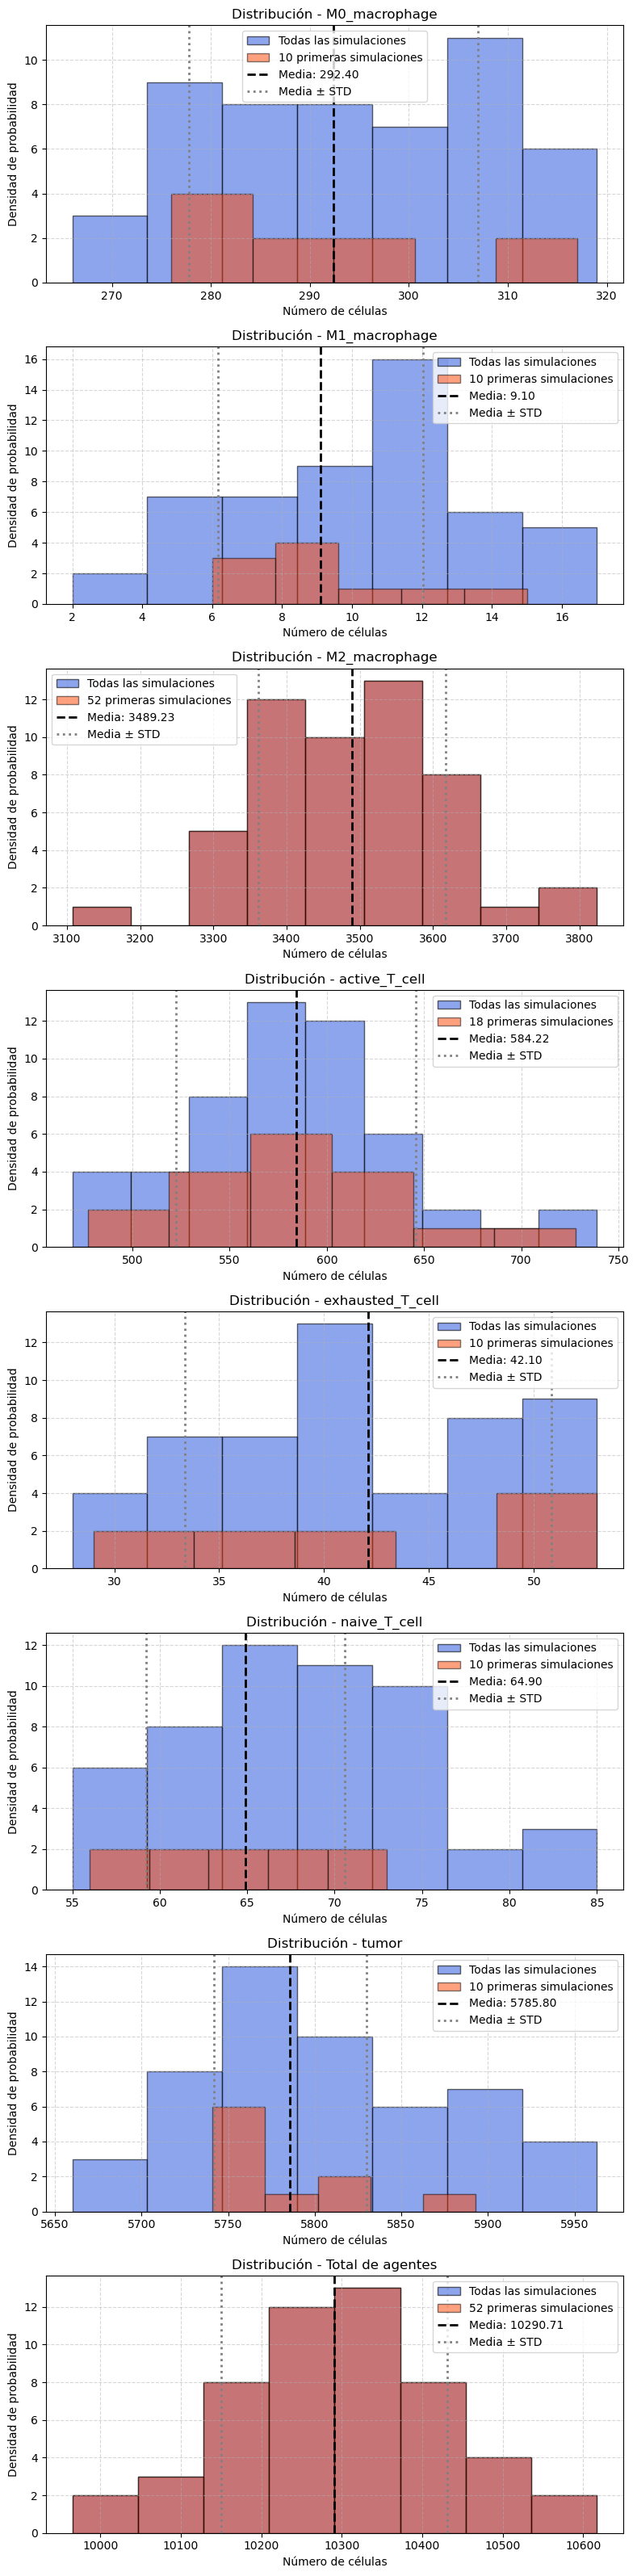

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reemplazar NaN por 0 en df_final antes de cualquier operación
df_final = df_final.fillna(0)

# Colores personalizados
color_total = "royalblue"
color_k = "orangered"
color_mean = "black"
color_std = "gray"
color_mean_k = "green"

# Crear una figura con subgráficos por cada tipo de célula
num_cell_types = len(df_final.index)
fig, axes = plt.subplots(nrows=num_cell_types, figsize=(8, 4 * num_cell_types))

# Si solo hay un tipo de célula, aseguramos que axes sea iterable
if num_cell_types == 1:
    axes = [axes]

# Iterar sobre cada tipo de célula y graficar en su subplot correspondiente
for ax, cell_type in zip(axes, df_final.index):
    # Obtener todas las simulaciones para este tipo de célula
    cell_values = df_final.loc[cell_type].values  

    # Obtener k desde k_values
    k = k_values.get(cell_type)  # Usamos 10 si no está en k_values

    # Obtener la media y desviación estándar desde df_summary
    mean_value = df_summary.at[cell_type, "mean"]
    std_value = df_summary.at[cell_type, "std"]


    # Histograma de todas las simulaciones
    ax.hist(cell_values, bins="auto", alpha=0.6, label="Todas las simulaciones", color=color_total, edgecolor='black')

    # Histograma de las primeras k simulaciones
    if k > 0 and k <= len(cell_values):
        ax.hist(cell_values[:k], bins="auto", alpha=0.5, label=f"{k} primeras simulaciones", color=color_k, edgecolor='black')


    # Líneas de media y desviación estándar
    ax.axvline(mean_value, color=color_mean, linestyle='dashed', linewidth=2, label=f"Media: {mean_value:.2f}")
    ax.axvline(mean_value - std_value, color=color_std, linestyle='dotted', linewidth=2, label=f"Media ± STD")
    ax.axvline(mean_value + std_value, color=color_std, linestyle='dotted', linewidth=2)

    ax.set_xlabel("Número de células")
    ax.set_ylabel("Densidad de probabilidad")
    ax.set_title(f"Distribución - {cell_type}")
    ax.legend()
    ax.grid(True, linestyle="--", alpha=0.5)

# Ajustar el espacio entre subgráficos
plt.tight_layout()
plt.show()


## Line plot

In [1]:
import pcdl
import pandas as pd
from concurrent.futures import ProcessPoolExecutor

pathfiles = 'outputs/baseline'

def process_mcds(mcds):
    df_cell = mcds.get_cell_df()
    df_celltype = df_cell.loc[:, ['cell_type', 'time']].copy()
    
    # Get count per cell type
    s_time = str(list(df_celltype.loc[:, 'time'])[0])
    df_celltype.columns = ['cell_type', s_time]
    df_count = df_celltype.groupby('cell_type').count()
    
    return df_count

# Initialize the series
df_series = None

# Parallel processing with 12 workers
mcdsts = pcdl.TimeSeries(f'{pathfiles}')
mcds_list = mcdsts.get_mcds_list()

with ProcessPoolExecutor(max_workers=12) as executor:
    results = executor.map(process_mcds, mcds_list)

# Combine the results
for df_count in results:
    if df_series is None:
        df_series = df_count
    else:
        df_series = pd.merge(df_series, df_count, left_index=True, right_index=True, how='outer')

# Add total agents row
df_series.loc['Total de agentes'] = df_series.sum(axis=0)

/home/rodolfo/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/rodolfo/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


reading: outputs/baseline/PhysiCell_settings.xml
reading: outputs/baseline/output00000000.xml
working on metadata ...
working on mesh data ...
reading: outputs/baseline/initial_mesh0.mat
working on microenvironment data ...
reading: outputs/baseline/output00000000_microenvironment0.mat
parsing: debris data
parsing: oxygen data
parsing: IFN-gamma data
parsing: IL-10 data
parsing: IL-4 data
parsing: antigen data
working on discrete cell data ...
reading: outputs/baseline/output00000000_cells.mat
working on graph data ...
reading: outputs/baseline/output00000000_cell_neighbor_graph.txt
reading: outputs/baseline/output00000000_attached_cells_graph.txt
working on physiboss data ...
Warning @ pyMCDS._read_xml : physiboss file missing outputs/baseline/states_00000000.csv.
done!

reading: outputs/baseline/PhysiCell_settings.xml
reading: outputs/baseline/output00000001.xml
working on metadata ...
working on mesh data ...
reading: outputs/baseline/initial_mesh0.mat
working on microenvironment da

In [2]:
df_series

,0.0,60.0,120.0,180.0,240.0,300.0,360.0,420.0,480.0,540.0,...,6660.0,6720.0,6780.0,6840.0,6900.0,6960.0,7020.0,7080.0,7140.0,7200.0
cell_type,,,,,,,,,,,,,,,,,,,,,
CD8_T_cell,NaN,4.0,9.0,13.0,13.0,15.0,16.0,16.0,22.0,25.0,...,37.0,30.0,29.0,27.0,27.0,28.0,25.0,28.0,21.0,21.0
M0_macrophage,200.0,16.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
M1_macrophage,NaN,NaN,NaN,1.0,1.0,2.0,3.0,3.0,3.0,3.0,...,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0
M2_macrophage,NaN,186.0,199.0,201.0,203.0,204.0,203.0,205.0,207.0,209.0,...,231.0,232.0,232.0,233.0,233.0,234.0,235.0,235.0,235.0,236.0
exhausted_T_cell,NaN,NaN,NaN,3.0,3.0,5.0,8.0,9.0,11.0,14.0,...,569.0,576.0,578.0,578.0,580.0,582.0,585.0,584.0,586.0,585.0
naive_T_cell,200.0,197.0,194.0,187.0,188.0,184.0,181.0,182.0,175.0,171.0,...,24.0,25.0,25.0,29.0,27.0,29.0,30.0,27.0,29.0,33.0
tumor,1000.0,1022.0,1054.0,1101.0,1124.0,1150.0,1183.0,1211.0,1232.0,1255.0,...,1137.0,1134.0,1133.0,1130.0,1135.0,1132.0,1130.0,1131.0,1131.0,1128.0
Total de agentes,1400.0,1425.0,1459.0,1508.0,1534.0,1562.0,1596.0,1628.0,1652.0,1679.0,...,2034.0,2033.0,2033.0,2033.0,2038.0,2041.0,2041.0,2041.0,2038.0,2039.0


<Figure size 1600x800 with 0 Axes>

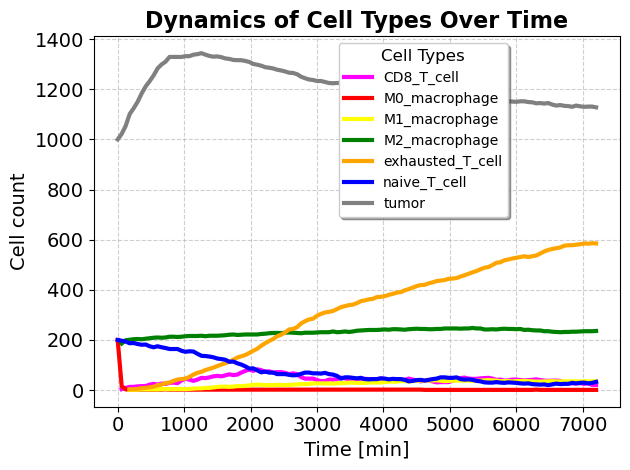

In [3]:
import matplotlib.pyplot as plt

# Define el esquema de colores fijo para cada tipo de célula
colores = {
    "tumor": "#808080",             # Gris
    "M0_macrophage": "#FF0000",     # Rojo
    "M1_macrophage": "#FFFF00",     # Amarillo
    "M2_macrophage": "#008000",     # Verde
    "naive_T_cell": "#0000FF",      # Azul
    "CD8_T_cell": "#FF00FF",        # Rosa
    "exhausted_T_cell": "#FFA500",  # Naranja
    "Total de agentes": "#9467bd",  # Púrpura (opcional para totales)
}

# Filtra filas no deseadas (opcional, por ejemplo, quitar 'Total de agentes')
df_filtered = df_series.drop(labels=['Total de agentes'], errors='ignore')

# Transponer el DataFrame para tener el tiempo como eje X
df_transposed = df_filtered.T

# Asegúrate de que el tiempo esté en el formato correcto para el eje X
df_transposed.index = df_transposed.index.astype(float)

# Define colores consistentes según los tipos de células
colores_usar = [colores[cell_type] for cell_type in df_transposed.columns]

# Crear la gráfica de líneas con una proporción más alargada
plt.figure(figsize=(16, 8))  # Proporción más ancha
ax = df_transposed.plot(
    kind='line',
    xlabel='Time [min]',
    ylabel='Cell count',
    linewidth=3,  # Líneas más gruesas
    color=colores_usar,  # Colores consistentes
    fontsize=14  # Tamaño del texto
)

ax.set_xlabel('Time [min]', fontsize=14)
ax.set_ylabel('Cell count', fontsize=14)

# Ajustes adicionales
plt.title('Dynamics of Cell Types Over Time', fontsize=16, weight='bold')
plt.grid(
    True, 
    linestyle='--', 
    linewidth=0.8, 
    alpha=0.6  # Transparencia de las líneas de la cuadrícula
)

# Ajustar la leyenda
ax.legend(
    title='Cell Types',
    title_fontsize=12,
    fontsize=10,
    loc='upper right',  # Ubicación ajustada
    bbox_to_anchor=(.8, 1),  # Reposiciona fuera del gráfico
    frameon=True,
    shadow=True
)

# Asegura que todo se ajuste bien
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd

df_seriesc = None

for mcds in mcdsts.get_mcds_list():
    df_data = mcds.get_conc_df()
    
    # Seleccionamos las columnas de interés y sumamos las concentraciones
    df_concentration = df_data.loc[:, ['time', 'IFN-gamma', 'IL-10', 'IL-4']].copy()
    s_time = str(df_concentration['time'].iloc[0]) 
    sum_ifn = df_concentration['IFN-gamma'].sum()   
    sum_il10 = df_concentration['IL-10'].sum()    
    sum_il4 = df_concentration['IL-4'].sum()
    
    df_sum = pd.DataFrame({'IFN-gamma': [sum_ifn], 'IL-10': [sum_il10], 'IL-4': [sum_il4]}, index=[s_time])
    
    # Almacenamos los resultados
    if df_seriesc is None:
        df_seriesc = df_sum
    else:
        df_seriesc = pd.concat([df_seriesc, df_sum], axis=0)

df_seriesc.index = df_seriesc.index.astype(float)  
df_seriesc = df_seriesc.sort_index()  


<Figure size 1200x600 with 0 Axes>

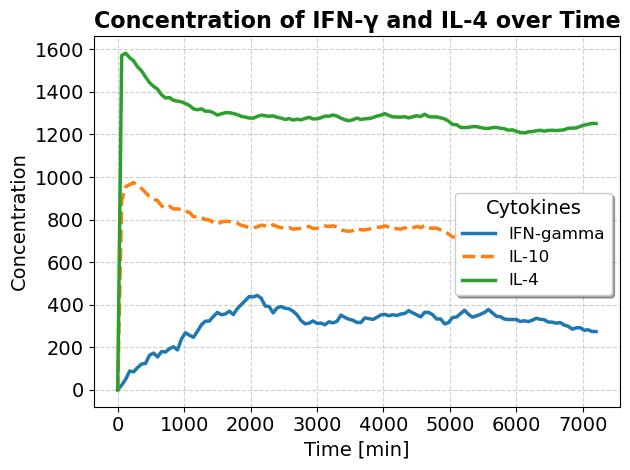

In [5]:
import matplotlib.pyplot as plt

# Configura el tamaño de la figura
plt.figure(figsize=(12, 6))

# Grafica las series con líneas más gruesas y diferentes estilos para distinguirlas
ax = df_seriesc.plot(
    kind='line',
    linewidth=2.5,  # Grosor de las líneas
    xlabel='Time [min]',
    ylabel='Concentration',
    fontsize=14,  # Tamaño de las etiquetas
    style=['-', '--'],  # Líneas continua y punteada como ejemplo
)

# Personaliza la cuadrícula para mayor claridad
plt.grid(
    True,
    linestyle='--',  # Líneas de la cuadrícula punteadas
    linewidth=0.8,  # Grosor de las líneas de la cuadrícula
    alpha=0.6,  # Transparencia de la cuadrícula
)

# Ajusta el título y los ejes para un diseño más claro
ax.set_title('Concentration of IFN-γ and IL-4 over Time', fontsize=16, weight='bold')
ax.set_xlabel('Time [min]', fontsize=14)
ax.set_ylabel('Concentration', fontsize=14)

# Añade una leyenda con estilo y posición ajustada
ax.legend(
    loc='upper right',  # Cambiado para evitar solapar las líneas
    fontsize=12, 
    title="Cytokines", 
    title_fontsize=14, 
    frameon=True,  # Fondo de la leyenda
    shadow=True,  # Sombra para destacar la leyenda
    bbox_to_anchor=(1, .6),  # Reposiciona la leyenda fuera del área del gráfico
)

# Asegura que todo se muestre correctamente
plt.tight_layout()
plt.show()
